In [1]:
!pip install missingno

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [3]:
df = pd.read_csv("/content/dataset_avaliacao_faltoso.csv", decimal=",")

In [4]:
df.head()

,timestamp,Potencia_Ativa_Gerada,Temperatura_Media_Gerador,Potencia_Reativa_Gerada,Pressao_Oleo_Gerador,Rotacao_Media_Gerador_RPM,Temperatura_Media_Oleo_Gerador,Temperatura_Media_Rolamento_Principal
0,2019-01-01 00:00:00-03:00,557.092,61.354,-492.380,1.258,1090.166,51.859,49.228
1,2019-01-01 00:10:00-03:00,556.622,61.345,-492.277,1.257,1090.162,51.858,49.227
2,2019-01-01 00:20:00-03:00,556.210,61.336,-492.186,1.257,1090.158,51.857,49.227
3,2019-01-01 00:30:00-03:00,555.819,61.326,-492.106,1.257,1090.155,51.857,49.226
4,2019-01-01 00:40:00-03:00,555.431,61.317,-492.032,1.257,1090.152,51.856,49.226


In [5]:
df.shape

(99999, 8)

In [6]:
df.columns

Index(['timestamp', 'Potencia_Ativa_Gerada', 'Temperatura_Media_Gerador',
       'Potencia_Reativa_Gerada', 'Pressao_Oleo_Gerador',
       'Rotacao_Media_Gerador_RPM', 'Temperatura_Media_Oleo_Gerador',
       'Temperatura_Media_Rolamento_Principal'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   timestamp                              99942 non-null  object 
 1   Potencia_Ativa_Gerada                  99928 non-null  float64
 2   Temperatura_Media_Gerador              99928 non-null  float64
 3   Potencia_Reativa_Gerada                99461 non-null  float64
 4   Pressao_Oleo_Gerador                   99928 non-null  float64
 5   Rotacao_Media_Gerador_RPM              99928 non-null  float64
 6   Temperatura_Media_Oleo_Gerador         99414 non-null  float64
 7   Temperatura_Media_Rolamento_Principal  99928 non-null  float64
dtypes: float64(7), object(1)
memory usage: 6.1+ MB


In [8]:
features = ['Potencia_Reativa_Gerada', 'Pressao_Oleo_Gerador', 'Rotacao_Media_Gerador_RPM', 'Temperatura_Media_Oleo_Gerador']
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Potencia_Reativa_Gerada         99461 non-null  float64
 1   Pressao_Oleo_Gerador            99928 non-null  float64
 2   Rotacao_Media_Gerador_RPM       99928 non-null  float64
 3   Temperatura_Media_Oleo_Gerador  99414 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


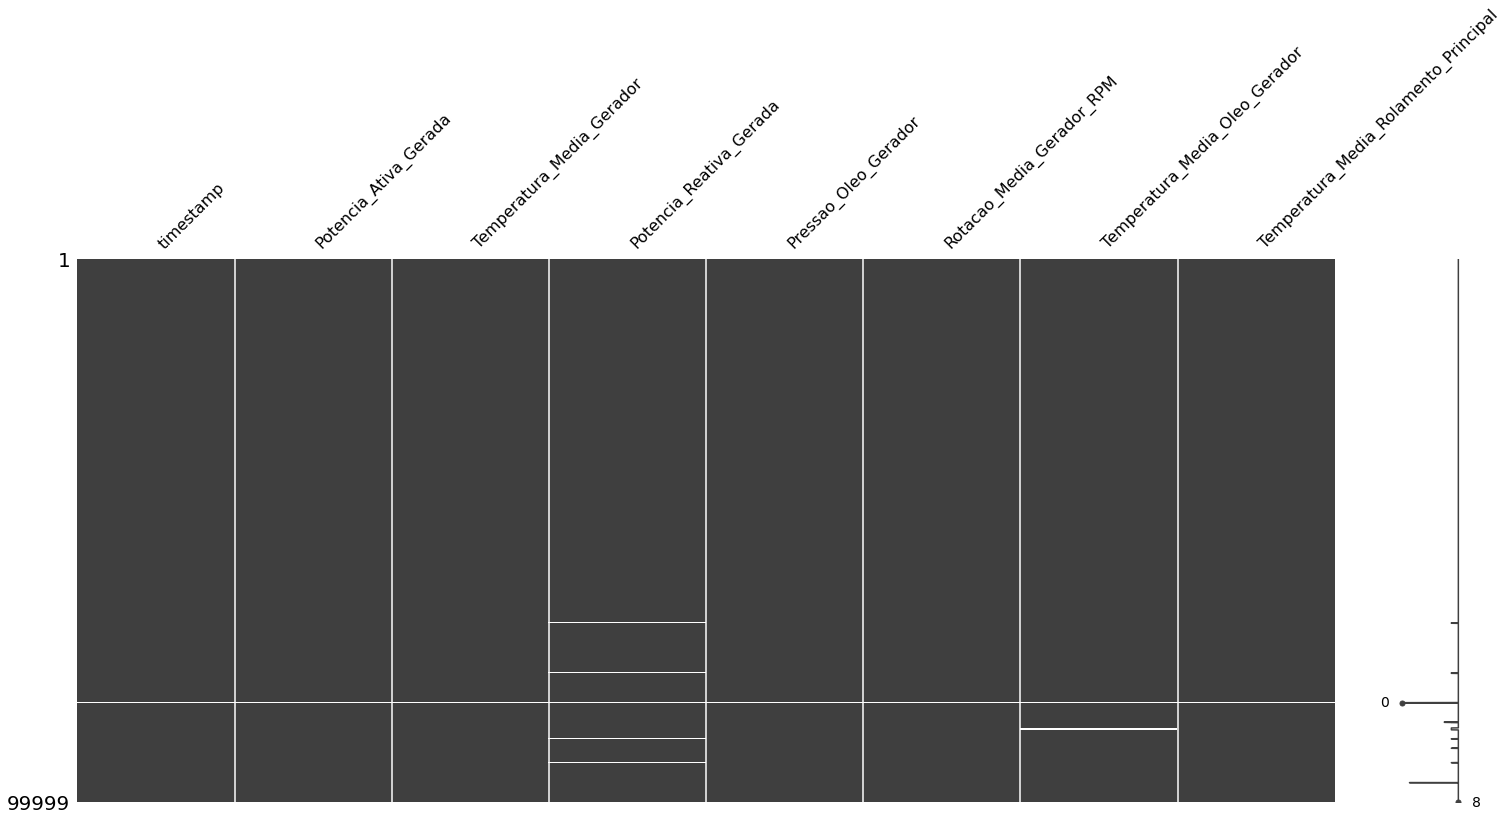

In [9]:
%matplotlib inline
msno.matrix(df)
plt.show()

In [10]:
colunas_missing = []
for col in df.columns:
  if df[col].isnull().any():
    colunas_missing.append(col)
print(colunas_missing)

['timestamp', 'Potencia_Ativa_Gerada', 'Temperatura_Media_Gerador', 'Potencia_Reativa_Gerada', 'Pressao_Oleo_Gerador', 'Rotacao_Media_Gerador_RPM', 'Temperatura_Media_Oleo_Gerador', 'Temperatura_Media_Rolamento_Principal']


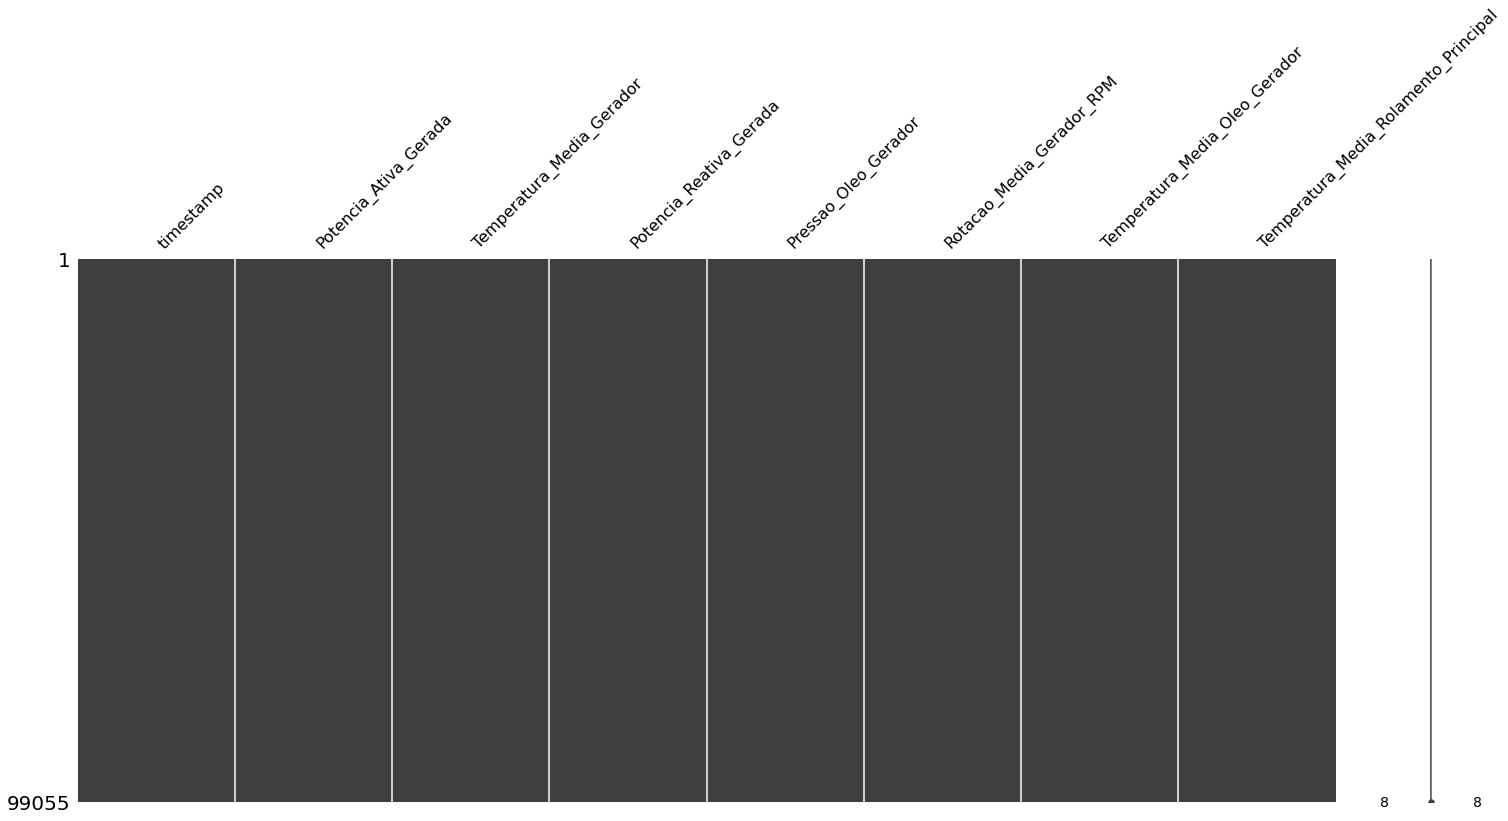

In [11]:
df_dropped = df.dropna(axis= 0 , how="any")
%matplotlib inline
msno.matrix(df_dropped)
plt.show()

In [12]:
retorno = df["timestamp"].isnull()
print(retorno)

0        False
1        False
2        False
3        False
4        False
         ...  
99994    False
99995    False
99996    False
99997    False
99998    False
Name: timestamp, Length: 99999, dtype: bool


In [13]:
colunas_missing = []
for col in df_dropped.columns:
  if df_dropped[col].isnull().any():
    colunas_missing.append(col)
print(colunas_missing)

[]


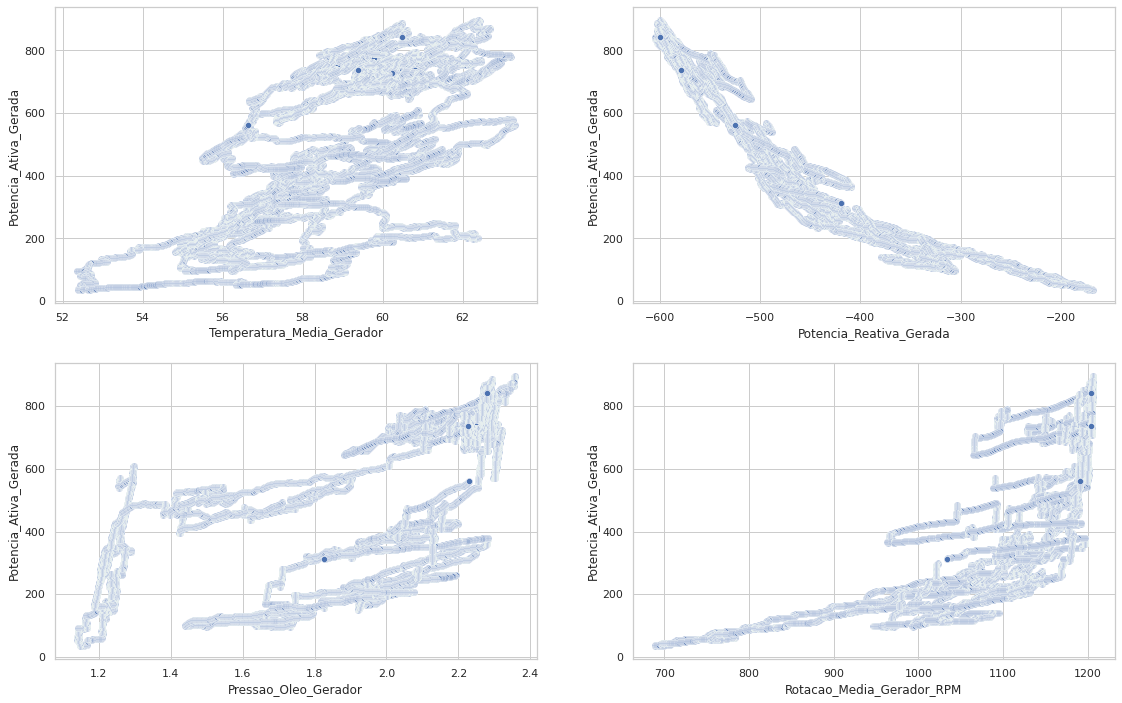

In [14]:
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['figure.figsize'] = (19,12)
sns.set_theme(style="whitegrid")

n_linhas = 2
n_cols = 2
features = df_dropped.columns[2::]
plt.figure()

for k in range(n_linhas*n_cols):
  plt.subplot(n_linhas,n_cols,k+1)
  #plt.scatter(df_dropped[features[k]],df_dropped["Potencia_Ativa_Gerada"])
  sns.scatterplot(data=df_dropped,x=features[k],y="Potencia_Ativa_Gerada")